In [135]:
import numpy as np 
import math

In [1]:
import robobo

Hardware Connection not available in python3 :(


In [2]:
robobo = robobo.SimulationRobobo().connect()

Connected to remote API server: client id 0


In [5]:
robobo.play_simulation()

# States

## Sensor Readings

The Robobo has 8 sensors from which data can be obtained. The array returned is in the format
```
[backR, backC, backL, frontRR, frontR, frontC, frontL, frontLL]
```

In [228]:
readings = robobo.read_irs()
readings

[False, False, False, False, False, False, False, False]

## Camera Images

In [71]:
def imshow(img):
    # https://gist.github.com/ctmakro/3ae3cd9538390b706820cd01dac6861f
    # image is in format [height, width, channels]
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

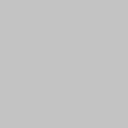

In [73]:
image = robobo.get_image_front()
imshow(image)

## Position

(x,y,z) coordinates of the Robobo

In [183]:
robobo.position()

[1.9545748233795166, 1.0645506381988525, 0.03711538389325142]

## Food

In [174]:
# robobo.collected_food()

# Actions

## Moving the Robobo

In [235]:
# Forward movement
robobo.move(100, 100, 10)

In [156]:
# Turn left
robobo.move(-30, 30, 1000)

In [170]:
# Turn right
robobo.move(30, -30, 500)

In [232]:
# Turn backwards
robobo.move(-30, -30, 1000)

In [238]:
readings = robobo.read_irs()
readings

[False,
 False,
 False,
 False,
 False,
 0.18619207668232465,
 0.19132297514718913,
 False]

### Moving the camera

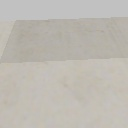

In [146]:
# Move camera down
robobo.set_phone_tilt(math.radians(90), 0.1)
imshow(robobo.get_image_front())

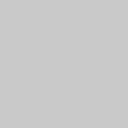

In [147]:
# Move camera up 
robobo.set_phone_tilt(math.radians(0), 0.1)
imshow(robobo.get_image_front())

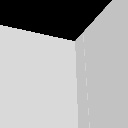

In [150]:
# View camera front
robobo.set_phone_pan(math.radians(0), 0.1)
imshow(robobo.get_image_front())

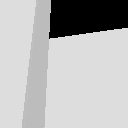

In [151]:
# View camera back
robobo.set_phone_pan(math.radians(180), 0.1)
imshow(robobo.get_image_front())

In [251]:
class RoboboStateSpace(spaces.Dict):
    def __init__(self):
        super().__init__(spaces=self.get_spaces())

    def get_spaces(self):
        return {
            'position': spaces.Box(low=-np.inf, high=np.inf, shape=(3,)),
            'front_cam': spaces.Box(low=0, high=255, shape=(128, 128, 3), dtype=np.int),
            'sensor_readings': spaces.Box(low=0, high=0.2, shape=(8,)),
        }
